In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr

# interactive plotting stuff 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

import seaborn as sns
#import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
#%config InlineBackend.figure_format = 'retina'

import cartopy
import cartopy.crs as ccrs

from datetime import datetime

import zipfile
import requests
import io
from io import BytesIO

import rasterio.features
from rasterio.features import geometry_mask
from rasterio.transform import from_origin
import rasterio
import rioxarray


In [23]:
# set working directory
os.chdir('/dartfs-hpc/rc/lab/C/CMIG/moshea/Projects/DataPoverty')

# set export directory (where to export figures)
export_dir = "/dartfs-hpc/rc/lab/C/CMIG/moshea/Projects/BayesianStats_FinalProject/figures/"

### Import Station and Station-Date Datasets ##

#### Data Source
Gridded GHCN data is unpublished, processed data that describes the number of station-dates per grid cell. 

In [26]:
# open berkeley stations per cell dataset
GHCN_SD_grid_dataset = xr.open_dataset('./DATA/gridded_GHCN_stationdatesanddensity/grid_GHCNstationdates_2024stations.nc')
ghcn_stations_percell_ds = xr.open_dataset('./DATA/gridded_GHCN_stationdatesanddensity/grid_GHCNstationdensity_2024stations.nc')


In [13]:
GHCN_SD_grid_dataset['stationdates_anom'] = GHCN_SD_grid_dataset.stationdates - GHCN_SD_grid_dataset.stationdates.mean()

In [25]:
GHCN_SD_grid_dataset

<xarray.Dataset>
Dimensions:            (lat: 173, lon: 359)
Coordinates:
  * lat                (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 80.0 81.0 82.0
  * lon                (lon) float64 -179.4 -178.4 -177.4 ... 176.6 177.6 178.6
Data variables:
    stationdates       (lat, lon) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    stationdates_anom  (lat, lon) float64 -5.037e+03 -5.037e+03 ... -5.037e+03

## Map Station-Dates

In [17]:
bnds = [-5000, -500, -250, 0, 250, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 100000]
bounds = bnds

cols_below_zero = plt.cm.Blues(np.linspace(0, 1, int(0.3 * len(bnds))))
cols_below_zero[:, 3] = 0.85
cols_above_zero = plt.cm.Reds(np.linspace(0, 1, int(1 * len(bnds))))

cols = np.vstack((cols_below_zero[::-1], cols_above_zero[1:]))

# Create a colormap using ListedColormap
cmap = colors.ListedColormap(cols)

# Create a normalization using BoundaryNorm
norm = colors.BoundaryNorm(boundaries=bnds, ncolors=len(bnds) - 1)


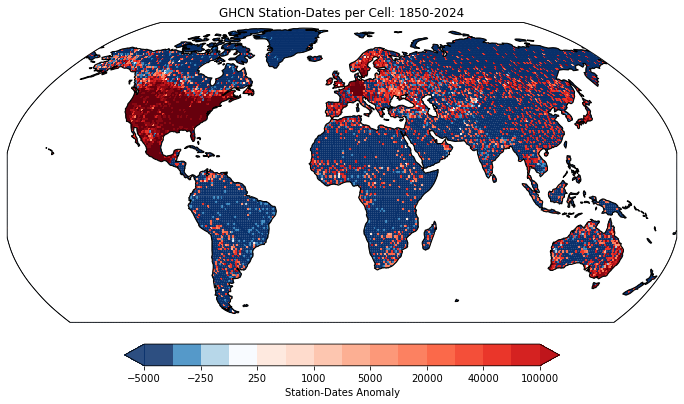

In [24]:
fig = plt.figure(figsize=(12, 8))

ax = plt.axes(projection=ccrs.Robinson())

# set ax facecolor
ax.set_facecolor('white')

GHCN_SD_grid_dataset.stationdates_anom.plot(ax=ax, cmap = cmap, norm = norm, transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_extent([-180,180,-60,90],ccrs.PlateCarree())

ax.set(title='GHCN Station-Dates per Cell: 1850-2024')

ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=1.5, facecolor='white', edgecolor = 'black')


# add colorbar at bottom
sm = plt.cm.ScalarMappable(norm=norm,cmap=cmap)
sm.set_array([])

every_other_bounds = bounds[::2]  

cbar = fig.colorbar(sm, 
                    ax=ax, 
                    orientation="horizontal",
                    label="Station-Dates Anomaly",
                    extend='both',
                    pad=0.05, 
                    use_gridspec=True,
                    fraction=0.05, 
                    ticks=every_other_bounds,
                    aspect=20)

plt.savefig(f"{export_dir}/ghcn_sdpercell_18502024.png", dpi=400)
plt.show()